In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = pd.read_pickle('MDHousingDataset_PreProcessed.pickle')

In [3]:
target = results['HousingSalesPrice']

In [4]:
data = results.drop(['HousingSalesPrice'], axis = 1)

# Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of a house in Catonsville, MD, we will need to separate the dataset into features and the target variable. The features,`'SizeofHouse`', `'HasBasement`', `'DwellingType`', `'NoofStories`', and `'StreetAddressType`' give us quantitative & qualitative information about each data point. The target variable, `'HousingSalesPrice`', will be the variable we seek to predict. These are stored in data and target, respectively.

## Calculate Basic Statistics on the Data - HousingSalesPrice

In [5]:
# Minimum normalized price of the data
minimum_price = np.amin(target)

# Maximum normalized price of the data
maximum_price = np.amax(target)

# Mean normalized price of the data
mean_price = np.mean(target)

# Median normalized price of the data
median_price = np.median(target)

# Standard deviation of normalized prices of the data
std_price = np.std(target)

# Show the calculated statistics
print("Statistics for Catonsville housing dataset:\n")
print("Minimum standardized price: {}".format(minimum_price)) 
print("Maximum standardized price: {}".format(maximum_price))
print("Mean standardized price: {}".format(mean_price))
print("Median standardized price {}".format(median_price))
print("Standard deviation of standardized prices: {}".format(std_price))

Statistics for Catonsville housing dataset:

Minimum standardized price: -1.6530076933893585
Maximum standardized price: 5.584184567702824
Mean standardized price: -0.16213180479449354
Median standardized price -0.34575398091866866
Standard deviation of standardized prices: 0.6777369816268108


# Feature Observation

As a reminder, we are using 5 features from Catonsville house dataset:`'PriorYearHousingSalesPrice'`, `'SizeofHouse'`, `'HouseAge'`, `'HasBasement'` , `'DwellingType'`, `'NoofStories'`, `'StreetAddressType`',and `'DwellingGrade`' .

For each data point (house):
- `'PriorYearHousingSalesPrice'` is the prior year sales price assessment on the house.
- `'SizeofHouse'` is the size in square feet of a house in Catonsville.
- `'HouseAge'` is the age of the house in years from the latest assessment (2020)
- `'StreetAddressType`' is the type of house. `'SF'` = Single Family and `'TH'` = TownHouse
- `'HasBasement'` is a binary to denote has basement `'1'` no basement `'0'`. For any homes without this indicator, we removed from the dataset
- `'DwellingType`' is broken out into 4 dummy variables: `'Center Unit'`, `'End Unit'`',`'Split Level'`,`'Standard Unit'`'
- `'NoofStories`' is broken out in 5 dummy variables: `'1'`, `'1 1/2'`, `'2'`, `'2 1/2'`, `'3'`
- `'DwellingGrade`' is a grade of the state of the property, given by an assessment to the property. Our scale is 2 (worse) to 7 (very good).


# Breaking out our data into training & test sets

In this section, we will break out our data into a test & training set.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train,data_test,target_train,target_test = train_test_split(data,target,train_size=0.30,random_state=0)

# Developing a Model
In this section of defining our model, I compare linear regression, ridge regression, and lasso regression to see how well each model makes a prediction. Being able to see how each model's performance compares through sklearn will help to reinforce confidence in my predictions.

I score all models using Mean squared error; in this sklearn module, the closer the value gets to 0, the better the model.

GridSearchCV will produce a negative mean square error; therefore, I multiply the negative mean squared error by -1 to get the true mean squared error


##  Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [9]:
linear = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}

In [10]:
lin_scoring = {'NMSE': 'neg_mean_squared_error','R2':'r2'}

In [11]:
lin_regressor = GridSearchCV(linear,param_grid=parameters,scoring=lin_scoring,refit='R2',return_train_score=True,iid=False,cv=7)

In [12]:
lin_regressor.fit(data_train,target_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid=False, n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
             scoring={'NMSE': 'neg_mean_squared_error', 'R2': 'r2'}, verbose=0)

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [14]:
ridge = Ridge()

In [15]:
parameters = {'alpha':[1e-10,1e-3,1e-2,1,5,10,11,15]}


In [16]:
rid_scoring = {'NMSE': 'neg_mean_squared_error','R2':'r2'}

In [17]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring=rid_scoring,refit='R2',iid=None,cv=7,return_train_score=True)

In [18]:
ridge_regressor.fit(data_train,target_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=None, n_jobs=None,
             param_grid={'alpha': [1e-10, 0.001, 0.01, 1, 5, 10, 11, 15]},
             pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
             scoring={'NMSE': 'neg_mean_squared_error', 'R2': 'r2'}, verbose=0)

# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [20]:
lasso = Lasso(tol=100)

In [21]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}


In [22]:
las_scoring = {'NMSE': 'neg_mean_squared_error','R2':'r2'}

In [23]:
lasso_regression=GridSearchCV(lasso,parameters,scoring=las_scoring,refit='R2',cv=7,iid=False,return_train_score=True)

In [24]:
lasso_regression.fit(data_train,target_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=100, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
             scoring={'NMSE': 'neg_mean_squared_error', 'R2': 'r2'}, verbose=0)

# Conclusion: Comparing Regression Scores

Now that we see how our models compare to the actual values, let's see how each model's Mean Squared Error and R-Squared scores compares to each other. Let's first examine the Mean Squared Error of each cross validation sample; then we review the R-Squared (refitted) of each cross validation sample.


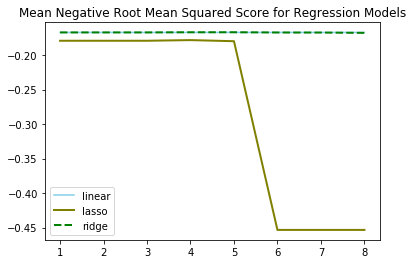

In [25]:
linear_results_test = lin_regressor.cv_results_['mean_test_NMSE']
lasso_results_test = lasso_regression.cv_results_['mean_test_NMSE']
ridge_results_test = ridge_regressor.cv_results_['mean_test_NMSE']
df=pd.DataFrame({'x':range(1,9), 'linear': linear_results_test, 'lasso': lasso_results_test, 'ridge': ridge_results_test })
plt.plot( 'x', 'linear', data=df,  markerfacecolor='blue', markersize=12, color='skyblue')
plt.plot( 'x', 'lasso', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'ridge', data=df, marker='', color='green', linewidth=2, linestyle='dashed')
plt.title('Mean Negative Root Mean Squared Score for Regression Models')
plt.legend()
plt.savefig('NMSEScoresPlot.png')

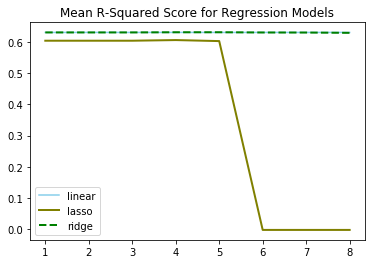

In [26]:
linear_results_test = lin_regressor.cv_results_['mean_test_R2']
lasso_results_test = lasso_regression.cv_results_['mean_test_R2']
ridge_results_test = ridge_regressor.cv_results_['mean_test_R2']
df=pd.DataFrame({'x':range(1,9), 'linear': linear_results_test, 'lasso': lasso_results_test, 'ridge': ridge_results_test })
plt.plot( 'x', 'linear', data=df,  markerfacecolor='blue', markersize=12, color='skyblue')
plt.plot( 'x', 'lasso', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'ridge', data=df, marker='', color='green', linewidth=2, linestyle='dashed')
plt.title('Mean R-Squared Score for Regression Models')
plt.legend()
plt.savefig('R2coresPlot.png')

In [27]:
NMSE_linear = sum(lin_regressor.cv_results_['mean_test_NMSE'])/len(lin_regressor.cv_results_['mean_test_NMSE'])
NMSE_ridge = sum(ridge_regressor.cv_results_['mean_test_NMSE'])/len(ridge_regressor.cv_results_['mean_test_NMSE'])
NMSE_lasso = sum(lasso_regression.cv_results_['mean_test_NMSE'])/len(lasso_regression.cv_results_['mean_test_NMSE'])

print("Regression Scores for Catonsville housing dataset:\n")
print("Linear - Average R2: {}".format(lin_regressor.best_score_)) 
print("Linear - Average Negative Root Mean Squared: {}\n".format(NMSE_linear))
print("Ridge - Average R2: {}".format(ridge_regressor.best_score_)) 
print("Ridge - Average Negative Root Mean Squared: {}\n".format(NMSE_ridge))
print("Lasso - Average R2: {}".format(lasso_regression.best_score_)) 
print("Lasso - Average Negative Root Mean Squared: {}".format(NMSE_lasso))

Regression Scores for Catonsville housing dataset:

Linear - Average R2: 0.630045705615038
Linear - Average Negative Root Mean Squared: -0.1672599442096836

Ridge - Average R2: 0.6306301000097133
Ridge - Average Negative Root Mean Squared: -0.16730654909635642

Lasso - Average R2: 0.6055785377166224
Lasso - Average Negative Root Mean Squared: -0.2820847663806925


# Plotting Our Training & Testing Data to See Results

Let's see how well our models performs between training & testing. One way to see the validation against training & testing data is to get the delta between the predictions and the true labels and plot on a histogram. This will help see how many predictions were different from the true label (and vice versa).


C:\Users\lwhieldon\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


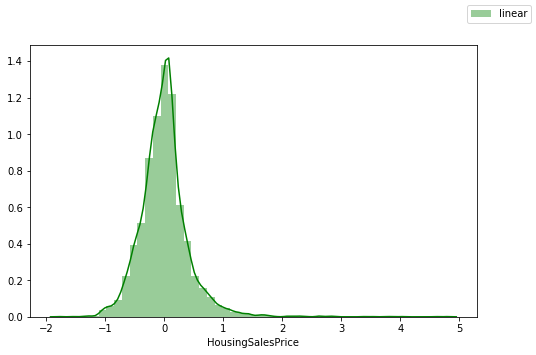

In [28]:
prediction_linear = lin_regressor.predict(data_test)
prediction_lasso = lasso_regression.predict(data_test)
prediction_ridge = ridge_regressor.predict(data_test)
import seaborn as sns

fig = plt.figure(figsize=(8,5))
sns.distplot(target_test-prediction_linear,color='Green')
fig.legend(labels=['linear'])
plt.savefig('distplotlinear.png')

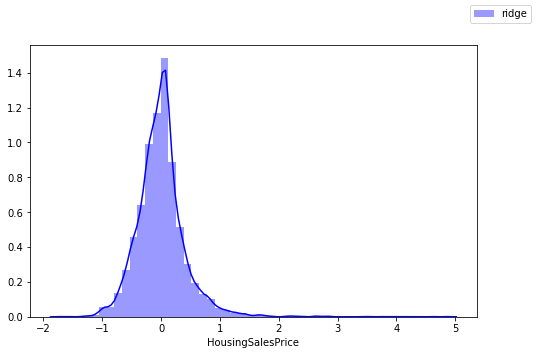

In [29]:
fig = plt.figure(figsize=(8,5))
sns.distplot(target_test-prediction_ridge,color='Blue')
fig.legend(labels=['ridge'])
plt.savefig('distplotridge.png')

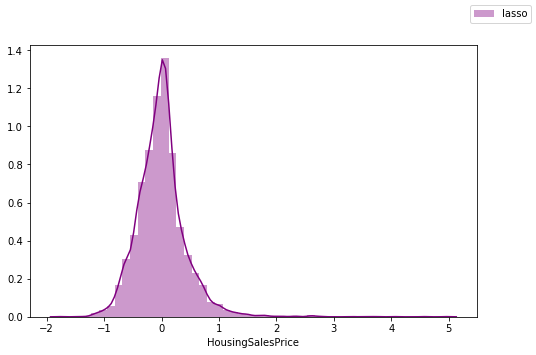

In [30]:
fig = plt.figure(figsize=(8,5))
sns.distplot(target_test-prediction_lasso,color='Purple')
fig.legend(labels=['lasso'])
plt.savefig('distplotlasso.png')